# patch

In [ ]:
#| default_exp patch

In [ ]:
# |hide
from nbdev.showdoc import *

In [ ]:
#| hide
#| export

import torch
from fastcore.foundation import patch_to
import matplotlib.pyplot as plt

from lovely_tensors.repr_str import StrProxy
from lovely_tensors.repr_rgb import RGBProxy
from lovely_tensors.repr_plt import PlotProxy
from lovely_tensors.repr_chans import ChanProxy

In [ ]:
# |export
def monkey_patch(cls=torch.Tensor):
    "Monkey-patch lovely features into `cls`" 

    @patch_to(cls)
    def __repr__(self: torch.Tensor, *, tensor_contents=None):        
        return str(StrProxy(self))

    # Keep an esiy way to get the standard behavior.
    @patch_to(cls, as_prop=True)
    def plain(self: torch.Tensor, *, tensor_contents=None):
        return StrProxy(self, plain=True)

    # And a verbose option for a good measure.
    @patch_to(cls, as_prop=True)
    def verbose(self: torch.Tensor, *, tensor_contents=None):
        return StrProxy(self, verbose=True)

    @patch_to(cls, as_prop=True)
    def deeper(self: torch.Tensor):
        return StrProxy(self, depth=1)

    @patch_to(cls, as_prop=True)
    def rgb(t: torch.Tensor):
        return RGBProxy(t)
    
    @patch_to(cls, as_prop=True)
    def chans(t: torch.Tensor):
        return ChanProxy(t)

    @patch_to(cls, as_prop=True)
    def plt(t: torch.Tensor):
        return PlotProxy(t)

In [ ]:
monkey_patch()

In [ ]:
image = torch.load("mysteryman.pt")
in_stats = { "mean": (0.485, 0.456, 0.406), "std": (0.229, 0.224, 0.225) }

In [ ]:
spicy = image.flatten()[:12].clone()

spicy[0] *= 10000
spicy[1] /= 10000
spicy[2] = float('inf')
spicy[3] = float('-inf')
spicy[4] = float('nan')

spicy = spicy.reshape((2,6))
spicy

tensor[2, 6] n=12 x∈[-3.541e+03, -3.369e-05] μ=-393.776 σ=1.180e+03 +inf! -inf! nan!

In [ ]:
spicy.verbose

tensor[2, 6] n=12 x∈[-3.541e+03, -3.369e-05] μ=-393.776 σ=1.180e+03 +inf! -inf! nan!
[[-3.5405e+03, -3.3693e-05,         inf,        -inf,         nan, -4.0543e-01],
 [-4.2255e-01, -4.9105e-01, -5.0818e-01, -5.5955e-01, -5.4243e-01, -5.0818e-01]]

In [ ]:
spicy.plain

[[-3.5405e+03, -3.3693e-05,         inf,        -inf,         nan, -4.0543e-01],
 [-4.2255e-01, -4.9105e-01, -5.0818e-01, -5.5955e-01, -5.4243e-01, -5.0818e-01]]

In [ ]:
image.deeper

tensor[3, 196, 196] n=115248 x∈[-2.118, 2.640] μ=-0.388 σ=1.073
  tensor[196, 196] n=38416 x∈[-2.118, 2.249] μ=-0.324 σ=1.036
  tensor[196, 196] n=38416 x∈[-1.966, 2.429] μ=-0.274 σ=0.973
  tensor[196, 196] n=38416 x∈[-1.804, 2.640] μ=-0.567 σ=1.178

In [ ]:
dt = torch.randn(3, 3, 5)
dt.deeper(3)

tensor[3, 3, 5] n=45 x∈[-1.765, 2.064] μ=0.252 σ=1.073
  tensor[3, 5] n=15 x∈[-1.339, 2.064] μ=0.831 σ=1.036
    tensor[5] x∈[-1.339, 1.145] μ=0.065 σ=1.114 [0.276, -1.339, 1.064, 1.145, -0.821]
    tensor[5] x∈[0.650, 1.764] μ=1.175 σ=0.472 [0.650, 0.840, 1.555, 1.764, 1.065]
    tensor[5] x∈[-0.662, 2.064] μ=1.252 σ=1.092 [-0.662, 1.609, 1.474, 1.773, 2.064]
  tensor[3, 5] n=15 x∈[-1.765, 1.914] μ=-0.019 σ=1.163
    tensor[5] x∈[-1.021, 1.059] μ=0.149 σ=0.798 [1.059, -1.021, -0.044, 0.048, 0.702]
    tensor[5] x∈[-1.765, 1.914] μ=-0.251 σ=1.423 [0.166, -0.354, -1.215, 1.914, -1.765]
    tensor[5] x∈[-1.323, 1.715] μ=0.045 σ=1.401 [1.715, -0.671, 1.389, -0.887, -1.323]
  tensor[3, 5] n=15 x∈[-1.392, 1.676] μ=-0.056 σ=0.809
    tensor[5] x∈[-0.437, 1.676] μ=0.077 σ=0.904 [1.676, -0.322, -0.437, -0.432, -0.099]
    tensor[5] x∈[-1.392, 0.076] μ=-0.487 σ=0.591 [0.076, -1.392, 0.013, -0.553, -0.578]
    tensor[5] x∈[-0.765, 1.480] μ=0.242 σ=0.870 [-0.370, 0.567, -0.765, 1.480, 0.299]

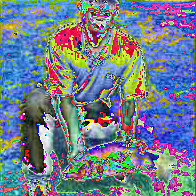

In [ ]:
image.rgb

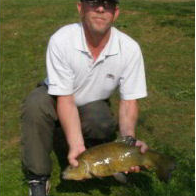

In [ ]:
image.rgb(in_stats)

In [ ]:
in_stats

{'mean': (0.485, 0.456, 0.406), 'std': (0.229, 0.224, 0.225)}

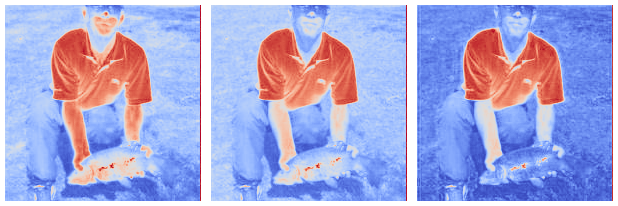

In [ ]:
std = torch.tensor(in_stats["std"])[:,None,None]
mean = torch.tensor(in_stats["mean"])[:,None,None]

(image*std + mean).chans # all pixels in [-0, 1] range

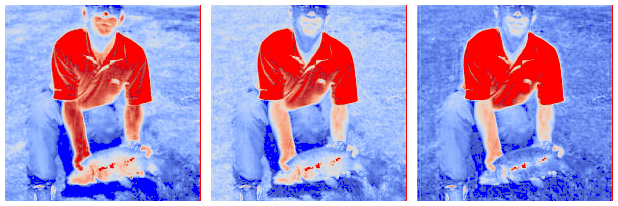

In [ ]:
(image*0.3+0.5).chans # Slightly outside of [0, 1] range, shows clipping (bright blue/red)

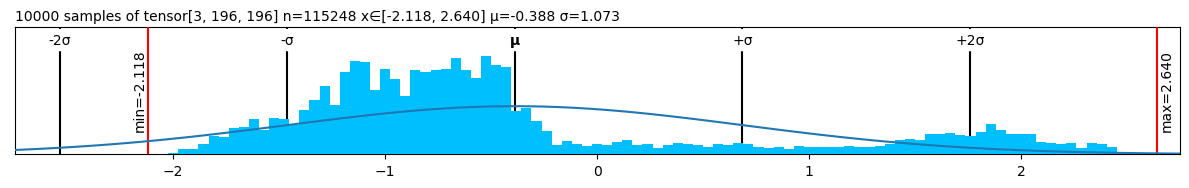

In [ ]:
image.plt

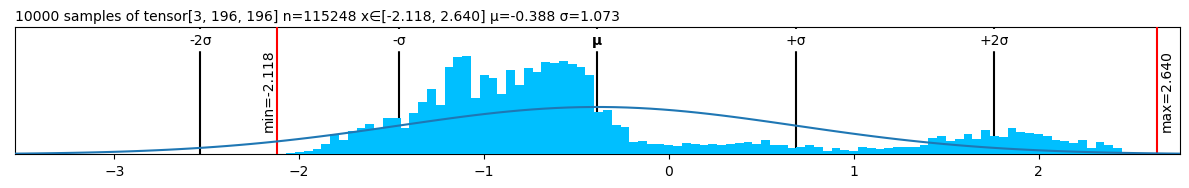

In [ ]:
image.plt(center="mean")

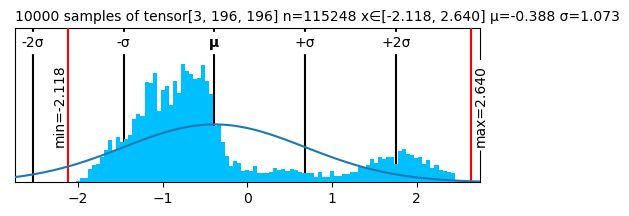

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2))
plt.close(fig)
image.plt(ax=ax)
fig

In [ ]:
# |hide
import nbdev; nbdev.nbdev_export()